In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [301]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Load the dataset
data = pd.read_excel('Consumptions.xlsx')

In [302]:
data.shape

(306, 22)

In [303]:
data.head()

,Date,Kinitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N,Electricity (kWh),Steam (kg),Total Water (Cu.m.) main meter + common
0,2024-01-01,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1105,-,-
1,2024-01-02,-,-,-,-,-,-,-,-,-,...,1,5,6,2,3,0,9,19118,50189,713
2,2024-01-15,36,30,-,38,2,-,6,-,-,...,1,5,4,2,2,3,3,18897,44268,437
3,2024-01-24,9,9,37,37,-,-,-,-,-,...,1,1,4,1,1,1,1,11195,84619,1064
4,2024-01-25,11,3,36,34,-,-,-,-,-,...,1,3,2,1,1,1,1,11593,85820,1023


In [304]:
data.isnull().sum()

Date                                        0
Kinitting - D                               0
Knitting - N                                0
Bulk Dye - D                                0
Bulk Dye - N                                0
Sample Dye - D                              0
Sample Dye - N                              0
Dryers - D                                  0
Dryers - N                                  0
Presetting - D                              0
Presetting - N                              0
Chillers - D                                0
Chillers - N                                0
AHU - D                                     0
AHU - N                                     0
Compressor - D                              0
Compressor - N                              0
Luwa - D                                    0
Luwa - N                                    0
Electricity (kWh)                           0
Steam (kg)                                  0
Total Water (Cu.m.) main meter + c

In [305]:
data.duplicated().sum()

0

In [306]:
# Data Cleaning
# Replace '-' with NaN and then fill NaNs with 0
data.replace('-', np.nan, inplace=True)

In [307]:
data.fillna(0, inplace=True)

In [308]:
data.head()

,Date,Kinitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N,Electricity (kWh),Steam (kg),Total Water (Cu.m.) main meter + common
0,2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,0.0,0.0
1,2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,6.0,2.0,3.0,0.0,9.0,19118.0,50189.0,713.0
2,2024-01-15,36.0,30.0,0.0,38.0,2.0,0.0,6.0,0.0,0.0,...,1.0,5.0,4.0,2.0,2.0,3.0,3.0,18897.0,44268.0,437.0
3,2024-01-24,9.0,9.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,1.0,1.0,1.0,1.0,11195.0,84619.0,1064.0
4,2024-01-25,11.0,3.0,36.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,1.0,1.0,1.0,1.0,11593.0,85820.0,1023.0


In [309]:
data.isnull().sum()

Date                                        0
Kinitting - D                               0
Knitting - N                                0
Bulk Dye - D                                0
Bulk Dye - N                                0
Sample Dye - D                              0
Sample Dye - N                              0
Dryers - D                                  0
Dryers - N                                  0
Presetting - D                              0
Presetting - N                              0
Chillers - D                                0
Chillers - N                                0
AHU - D                                     0
AHU - N                                     0
Compressor - D                              0
Compressor - N                              0
Luwa - D                                    0
Luwa - N                                    0
Electricity (kWh)                           0
Steam (kg)                                  0
Total Water (Cu.m.) main meter + c

In [310]:
# Summing day and night values for each machine type
data['Knitting'] = data['Kinitting - D'] + data['Knitting - N']
data['Bulk_Dye'] = data['Bulk Dye - D'] + data['Bulk Dye - N']
data['Sample_Dye'] = data['Sample Dye - D'] + data['Sample Dye - N']
data['Dryers'] = data['Dryers - D'] + data['Dryers - N']
data['Presetting'] = data['Presetting - D'] + data['Presetting - N']
data['Chillers'] = data['Chillers - D'] + data['Chillers - N']
data['AHU'] = data['AHU - D'] + data['AHU - N']
data['Compressor'] = data['Compressor - D'] + data['Compressor - N']
data['Luwa'] = data['Luwa - D'] + data['Luwa - N']

In [311]:
data.head()

,Date,Kinitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Total Water (Cu.m.) main meter + common,Knitting,Bulk_Dye,Sample_Dye,Dryers,Presetting,Chillers,AHU,Compressor,Luwa
0,2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,713.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,5.0,9.0
2,2024-01-15,36.0,30.0,0.0,38.0,2.0,0.0,6.0,0.0,0.0,...,437.0,66.0,38.0,2.0,6.0,0.0,2.0,9.0,4.0,6.0
3,2024-01-24,9.0,9.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1064.0,18.0,74.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0
4,2024-01-25,11.0,3.0,36.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1023.0,14.0,70.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0


In [312]:
columns_to_drop = [
    'Date', 'Kinitting - D', 'Knitting - N', 'Bulk Dye - D', 'Bulk Dye - N',
    'Sample Dye - D', 'Sample Dye - N', 'Dryers - D', 'Dryers - N', 'Presetting - D',
    'Presetting - N', 'Chillers - D', 'Chillers - N', 'AHU - D', 'AHU - N',
    'Compressor - D', 'Compressor - N', 'Luwa - D', 'Luwa - N', 'Steam (kg)',
    'Total Water (Cu.m.) main meter + common '
]
data.drop(columns=columns_to_drop, inplace=True)

In [313]:
data.head()

,Electricity (kWh),Knitting,Bulk_Dye,Sample_Dye,Dryers,Presetting,Chillers,AHU,Compressor,Luwa
0,1105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19118.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,5.0,9.0
2,18897.0,66.0,38.0,2.0,6.0,0.0,2.0,9.0,4.0,6.0
3,11195.0,18.0,74.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0
4,11593.0,14.0,70.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0


In [314]:
data = data[['Knitting', 'Bulk_Dye', 'Sample_Dye', 'Dryers',
             'Presetting', 'Chillers', 'AHU', 'Compressor', 'Luwa',
             'Electricity (kWh)']]

In [315]:
data.head()

,Knitting,Bulk_Dye,Sample_Dye,Dryers,Presetting,Chillers,AHU,Compressor,Luwa,Electricity (kWh)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0
1,0.0,0.0,0.0,0.0,0.0,2.0,11.0,5.0,9.0,19118.0
2,66.0,38.0,2.0,6.0,0.0,2.0,9.0,4.0,6.0,18897.0
3,18.0,74.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0,11195.0
4,14.0,70.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0,11593.0


In [316]:
# Check the data types of each variable
print(data.dtypes)

Knitting             float64
Bulk_Dye             float64
Sample_Dye           float64
Dryers               float64
Presetting           float64
Chillers             float64
AHU                  float64
Compressor           float64
Luwa                 float64
Electricity (kWh)    float64
dtype: object


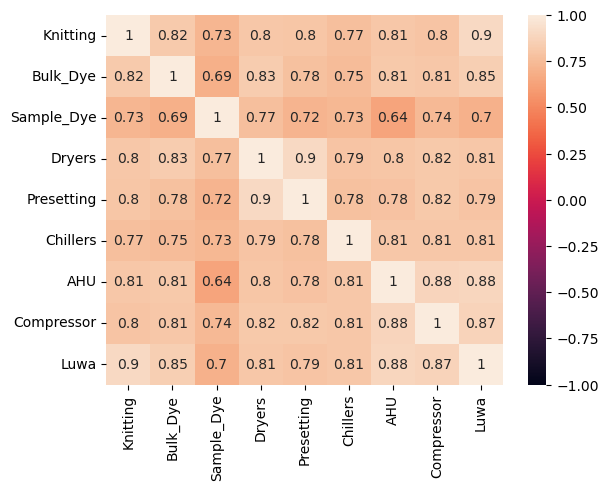

In [317]:
sns.heatmap(data[['Knitting', 'Bulk_Dye', 'Sample_Dye', 'Dryers',
             'Presetting', 'Chillers', 'AHU', 'Compressor', 'Luwa']].corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [318]:
# Select features and target variable
features = data[['Knitting', 'Bulk_Dye', 'Sample_Dye', 'Dryers',
             'Presetting', 'Chillers', 'AHU', 'Compressor', 'Luwa']]
target = data['Electricity (kWh)']

In [319]:
# Convert features and target to numeric to handle any remaining string issues
features = features.apply(pd.to_numeric)
target = pd.to_numeric(target)

In [320]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Hyperparameter Tuning with RandomizedSearchCV
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['None', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV with Random Forest Regressor
model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)



In [321]:
# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\wdewp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wdewp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wdewp\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\wdewp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\wdewp\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['None', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [322]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Use the best model found
best_model = random_search.best_estimator_

# Cross-validation for better accuracy assessment
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean Cross-validated R² score:", cv_scores.mean())

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Tuned Mean Absolute Error (MAE):", mae)
print("Tuned Root Mean Squared Error (RMSE):", rmse)
print("Tuned R² Score:", r2)

Cross-validated R² scores: [0.93297548 0.9604766  0.98360155 0.98390777 0.95631437]
Mean Cross-validated R² score: 0.9634551541483246
Tuned Mean Absolute Error (MAE): 771.9906086824791
Tuned Root Mean Squared Error (RMSE): 1079.1083236330874
Tuned R² Score: 0.989221446463624


In [323]:
import pandas as pd

# Define new input data as a dictionary
# Replace these values with the new inputs you want to test
new_data = {
    'Knitting': [349],
    'Bulk_Dye': [57],
    'Sample_Dye': [18],
    'Dryers': [19],
    'Presetting': [6],
    'Chillers': [14],
    'AHU': [9],
    'Compressor': [5],
    'Luwa': [13]
}

# Convert the dictionary to a DataFrame
new_input = pd.DataFrame(new_data)

# Predict using the best model
predicted_consumption = best_model.predict(new_input)

# Display the predicted result
print("Predicted Electricity Consumption (kWh) for new input:", predicted_consumption[0])

Predicted Electricity Consumption (kWh) for new input: 28525.965122103808


In [324]:
with open('./electricity_pkl.sav', 'wb') as file:
    pickle.dump(best_model, file)